In [1]:
import os

import numpy as np
import pandas as pd

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import to_categorical       # for LSTM preprocessing
from sklearn.neural_network import MLPClassifier

# reporting tools
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [34]:
"""
Unable to use google colab as the larger files does not load into colab file.
Colab_link = https://colab.research.google.com/drive/1hirVD1vHBpQqO3hP0uNAWPBVeyrZNQFd#scrollTo=stahJytT5gXK
dataset_link = https://drive.google.com/drive/u/0/folders/1JOLRaqb7fSOKuoutwTlEFtrai_y2M_tl
"""

directory = "C:\\Users\\XORDAN\\Desktop\\CSE427\\Project\\BCCC-CIC-IDS2017\\BCCC-CIC-IDS-2017"
all_files = os.listdir(directory)

dfs = []
benign = 0
malicious = 0

for file in all_files:
    if file.endswith(".csv"):
        df = pd.read_csv(directory + "\\" + file)
        
        rows, cols = df.shape
        if "benign" in file:
            benign += rows
        else:
            malicious += rows
        
        print(f"{file}- Rows:{rows}, Columns:{cols}")
        dfs.append(df)

botnet_ares.csv- Rows:5508, Columns:122
ddos_loit.csv- Rows:95733, Columns:122
dos_golden_eye.csv- Rows:8364, Columns:122
dos_hulk.csv- Rows:349240, Columns:122
dos_slowhttptest.csv- Rows:6860, Columns:122
dos_slowloris.csv- Rows:5177, Columns:122
friday_benign.csv- Rows:364102, Columns:122
ftp_patator.csv- Rows:9531, Columns:122
heartbleed.csv- Rows:12, Columns:122
monday_benign.csv- Rows:495338, Columns:122
portscan.csv- Rows:161323, Columns:122
ssh_patator-new.csv- Rows:5949, Columns:122
thursday_benign.csv- Rows:133770, Columns:122
tuesday_benign.csv- Rows:395976, Columns:122
web_brute_force.csv- Rows:2734, Columns:122
web_sql_injection.csv- Rows:24, Columns:122
web_xss.csv- Rows:1358, Columns:122
wednesday_benign.csv- Rows:397053, Columns:122


In [3]:
combined_df = pd.concat(dfs, ignore_index=True)
total_rows, total_cols = combined_df.shape

In [4]:
combined_df.head(5)

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label
0,192.168.10.9_1841_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:13.990571,192.168.10.9,1841,205.174.165.73,8080,TCP,0.135358,8,4,...,0.044844,0.061008,0.131123,0.001660,0.134532,0.0,0.0,0.0,0.0,Botnet_ARES
1,192.168.10.9_1845_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:24.131090,192.168.10.9,1845,205.174.165.73,8080,TCP,0.128585,8,4,...,0.042638,0.057734,0.124286,0.001701,0.127915,0.0,0.0,0.0,0.0,Botnet_ARES
2,192.168.10.9_1846_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:34.262355,192.168.10.9,1846,205.174.165.73,8080,TCP,0.166355,10,5,...,0.041467,0.070571,0.163697,0.000204,0.165869,0.0,0.0,0.0,0.0,Botnet_ARES
3,192.168.10.9_1847_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:34.526581,192.168.10.9,1847,205.174.165.73,8080,TCP,0.065549,8,4,...,0.021602,0.028732,0.062233,0.001017,0.064805,0.0,0.0,0.0,0.0,Botnet_ARES
4,192.168.10.9_1848_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:44.594895,192.168.10.9,1848,205.174.165.73,8080,TCP,0.080872,8,4,...,0.026761,0.036088,0.077792,0.000637,0.080284,0.0,0.0,0.0,0.0,Botnet_ARES


Total Rows: 2438052, Total Columns: 122
Benign Rows: 1786239
Malicious Rows: 651813


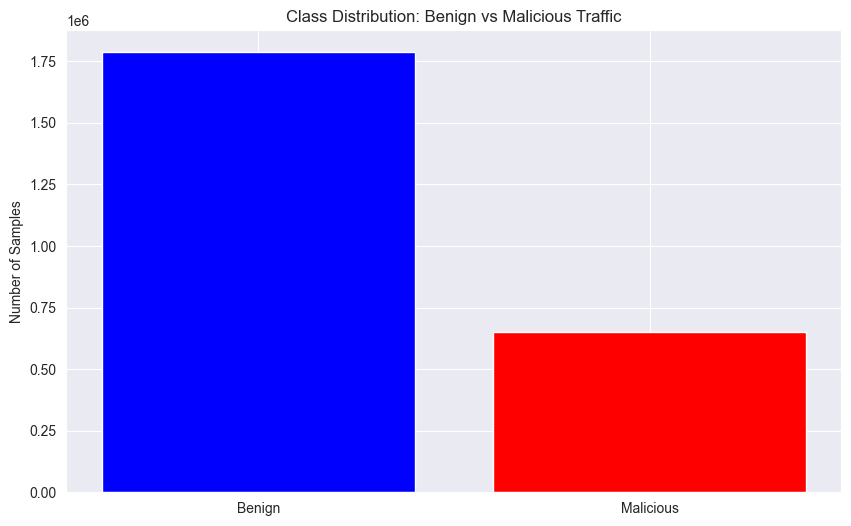

In [5]:
print(f"Total Rows: {total_rows}, Total Columns: {total_cols}")
print(f"Benign Rows: {benign}")
print(f"Malicious Rows: {malicious}")

labels = ['Benign', 'Malicious']
counts = [benign, malicious]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'red'])
plt.ylabel('Number of Samples')
plt.title('Class Distribution: Benign vs Malicious Traffic')
plt.show()

In [6]:
print(combined_df.head(2))

                                             flow_id  \
0  192.168.10.9_1841_205.174.165.73_8080_TCP_2017...   
1  192.168.10.9_1845_205.174.165.73_8080_TCP_2017...   

                    timestamp        src_ip  src_port          dst_ip  \
0  2017-07-07 09:04:13.990571  192.168.10.9      1841  205.174.165.73   
1  2017-07-07 09:04:24.131090  192.168.10.9      1845  205.174.165.73   

   dst_port protocol  duration  packets_count  fwd_packets_count  ...  \
0      8080      TCP  0.135358              8                  4  ...   
1      8080      TCP  0.128585              8                  4  ...   

   bwd_packets_IAT_mean  bwd_packets_IAT_std  bwd_packets_IAT_max  \
0              0.044844             0.061008             0.131123   
1              0.042638             0.057734             0.124286   

   bwd_packets_IAT_min  bwd_packets_IAT_total  subflow_fwd_packets  \
0             0.001660               0.134532                  0.0   
1             0.001701               0.1279

## Preprocessing ##

In [7]:
class_counts = combined_df['label'].value_counts()
valid_classes = class_counts[class_counts >= 1000].index    # less than 1000 samples does not seem enough to train the models

filtered_df = combined_df[combined_df['label'].isin(valid_classes)]

In [8]:
X = filtered_df.drop(columns = ['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'label'])
y = filtered_df['label']

le = LabelEncoder()
X['protocol'] = le.fit_transform(X['protocol'])
y = le.fit_transform(y)

print("Missing values:\n", X.isnull().sum())

Missing values:
 src_port                 0
dst_port                 0
protocol                 0
duration                 0
packets_count            0
                        ..
bwd_packets_IAT_total    0
subflow_fwd_packets      0
subflow_bwd_packets      0
subflow_fwd_bytes        0
subflow_bwd_bytes        0
Length: 117, dtype: int64


In [9]:
print(X.head(2))

   src_port  dst_port  protocol  duration  packets_count  fwd_packets_count  \
0      1841      8080         0  0.135358              8                  4   
1      1845      8080         0  0.128585              8                  4   

   bwd_packets_count  total_payload_bytes  fwd_total_payload_bytes  \
0                  4                  322                      194   
1                  4                  322                      194   

   bwd_total_payload_bytes  ...  fwd_packets_IAT_total  bwd_packets_IAT_mean  \
0                      128  ...               0.134812              0.044844   
1                      128  ...               0.127781              0.042638   

   bwd_packets_IAT_std  bwd_packets_IAT_max  bwd_packets_IAT_min  \
0             0.061008             0.131123             0.001660   
1             0.057734             0.124286             0.001701   

   bwd_packets_IAT_total  subflow_fwd_packets  subflow_bwd_packets  \
0               0.134532           

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest Classifier ##

In [11]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1
)   # utilizing full CPU power
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
print(f"Random Forest Classifier Complete.")

Random Forest Classifier Complete.


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc, target_names=le.classes_))

Classification Report:
                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00    357248
     Botnet_ARES       1.00      1.00      1.00      1102
       DDoS_LOIT       1.00      1.00      1.00     19147
   DoS_GoldenEye       1.00      0.99      0.99      1673
        DoS_Hulk       1.00      1.00      1.00     69848
DoS_Slowhttptest       0.98      0.98      0.98      1372
   DoS_Slowloris       0.97      0.98      0.98      1035
     FTP-Patator       1.00      1.00      1.00      1906
       Port_Scan       1.00      1.00      1.00     32265
     SSH-Patator       1.00      1.00      1.00      1190
 Web_Brute_Force       0.90      0.90      0.90       547
         Web_XSS       0.88      0.84      0.86       271

        accuracy                           1.00    487604
       macro avg       0.98      0.97      0.98    487604
    weighted avg       1.00      1.00      1.00    487604



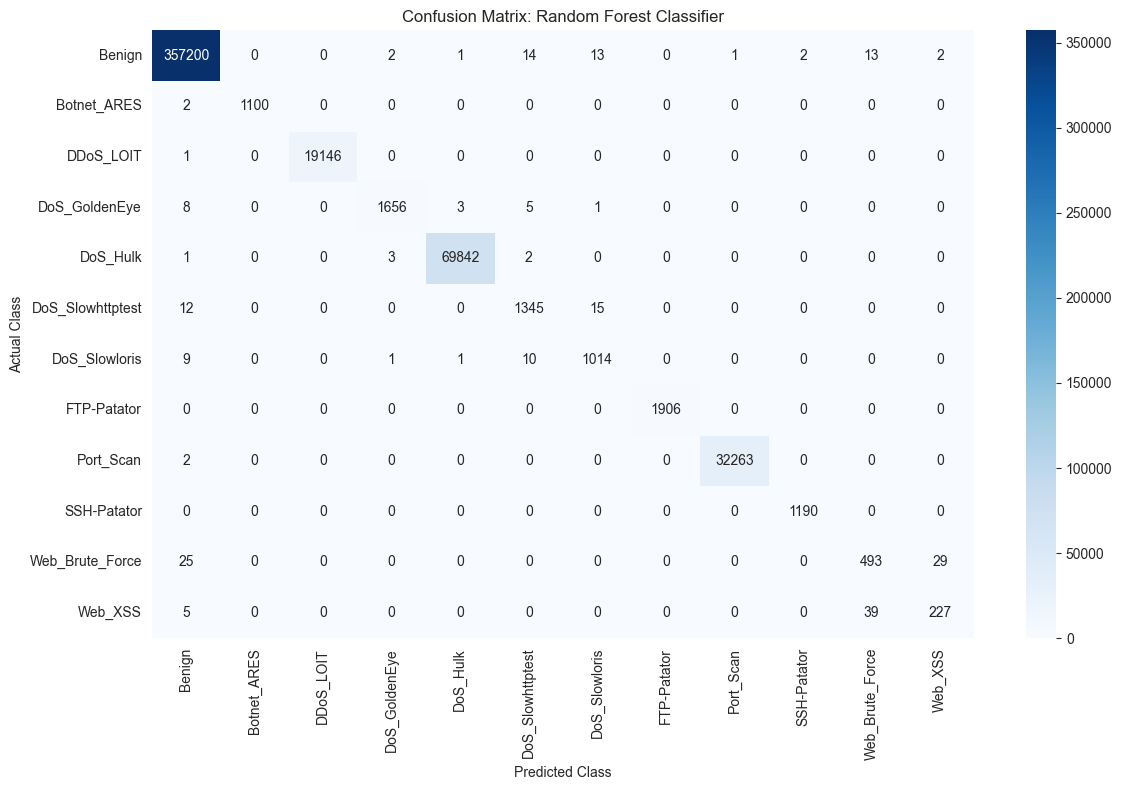

In [13]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
labels = le.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## XGBoost Classifier ##

In [14]:
xgbc = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    gpu_id=0)        #leveraging the GPU
xgbc.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_test)
print(f"XGBoost Classifier Complete. Score: {xgbc.score(X_test, y_test)}")

XGBoost Classifier Complete. Score: 0.9995344582899238


In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgbc, target_names=le.classes_))

Classification Report:
                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00    357248
     Botnet_ARES       1.00      1.00      1.00      1102
       DDoS_LOIT       1.00      1.00      1.00     19147
   DoS_GoldenEye       1.00      1.00      1.00      1673
        DoS_Hulk       1.00      1.00      1.00     69848
DoS_Slowhttptest       0.98      0.99      0.99      1372
   DoS_Slowloris       0.99      0.98      0.99      1035
     FTP-Patator       1.00      1.00      1.00      1906
       Port_Scan       1.00      1.00      1.00     32265
     SSH-Patator       1.00      1.00      1.00      1190
 Web_Brute_Force       0.88      0.85      0.87       547
         Web_XSS       0.80      0.84      0.82       271

        accuracy                           1.00    487604
       macro avg       0.97      0.97      0.97    487604
    weighted avg       1.00      1.00      1.00    487604



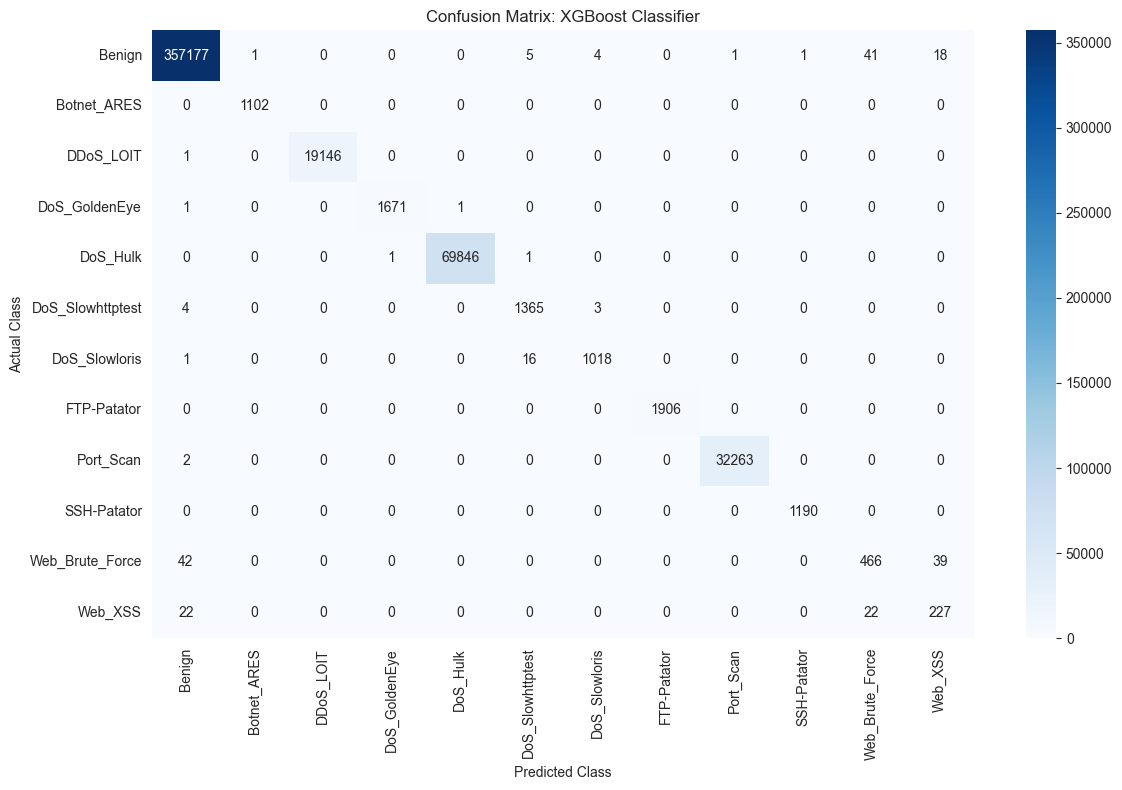

In [16]:
cm_xgbc = confusion_matrix(y_test, y_pred_xgbc)
labels = le.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_xgbc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix: XGBoost Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Cat Boost Classifier ##

In [17]:
cbc = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose = False,
    eval_metric='Accuracy',
    task_type='GPU',
    random_seed=42
)
cbc.fit(X_train, y_train)

y_pred_cbc = cbc.predict(X_test)
print(f"Cat Boost Classifier Complete.")

Cat Boost Classifier Complete.


In [18]:
print("CatBoostClassifier Results:")
print(classification_report(y_test, y_pred_cbc, target_names=le.classes_))

CatBoostClassifier Results:
                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00    357248
     Botnet_ARES       1.00      1.00      1.00      1102
       DDoS_LOIT       1.00      1.00      1.00     19147
   DoS_GoldenEye       1.00      0.99      0.99      1673
        DoS_Hulk       1.00      1.00      1.00     69848
DoS_Slowhttptest       0.97      0.97      0.97      1372
   DoS_Slowloris       0.97      0.97      0.97      1035
     FTP-Patator       1.00      1.00      1.00      1906
       Port_Scan       1.00      1.00      1.00     32265
     SSH-Patator       1.00      0.99      1.00      1190
 Web_Brute_Force       0.86      0.52      0.65       547
         Web_XSS       0.90      0.49      0.63       271

        accuracy                           1.00    487604
       macro avg       0.97      0.91      0.93    487604
    weighted avg       1.00      1.00      1.00    487604



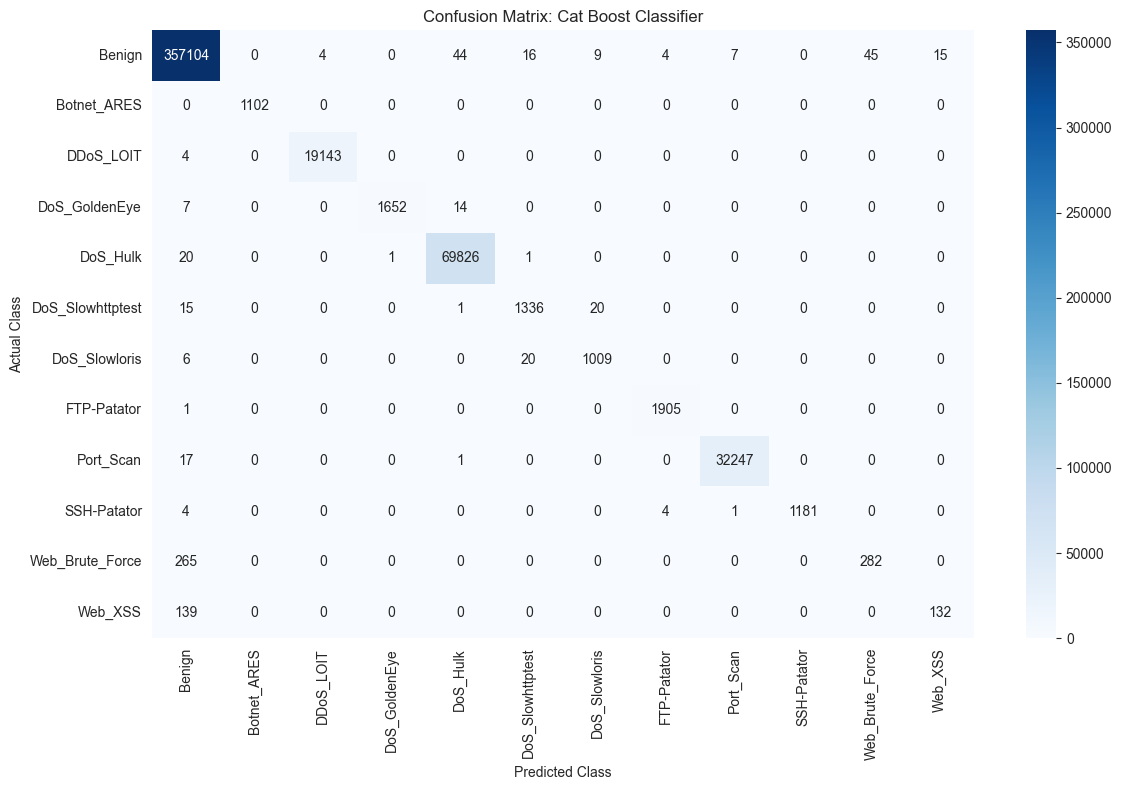

In [19]:
cm_cbc = confusion_matrix(y_test, y_pred_cbc)
labels = le.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_cbc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix: Cat Boost Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## HistGradient Boosting Classifier ##

In [20]:
hgbc = HistGradientBoostingClassifier(
    max_iter = 500,
    learning_rate = 0.05,
    max_depth = 7,
    random_state = 42
)
hgbc.fit(X_train, y_train)

y_pred_hgbc = hgbc.predict(X_test)
print(f"HistGradient Boost Classifier Complete.")

HistGradient Boost Classifier Complete.


In [21]:
print("HistGradientBoostingClassifier Results:")
print(classification_report(y_test, y_pred_hgbc, target_names=le.classes_))

HistGradientBoostingClassifier Results:
                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00    357248
     Botnet_ARES       0.99      1.00      1.00      1102
       DDoS_LOIT       1.00      1.00      1.00     19147
   DoS_GoldenEye       0.96      0.98      0.97      1673
        DoS_Hulk       1.00      1.00      1.00     69848
DoS_Slowhttptest       0.96      0.94      0.95      1372
   DoS_Slowloris       0.97      0.89      0.93      1035
     FTP-Patator       1.00      1.00      1.00      1906
       Port_Scan       1.00      1.00      1.00     32265
     SSH-Patator       0.99      1.00      1.00      1190
 Web_Brute_Force       0.60      0.57      0.58       547
         Web_XSS       0.17      0.49      0.25       271

        accuracy                           1.00    487604
       macro avg       0.89      0.91      0.89    487604
    weighted avg       1.00      1.00      1.00    487604



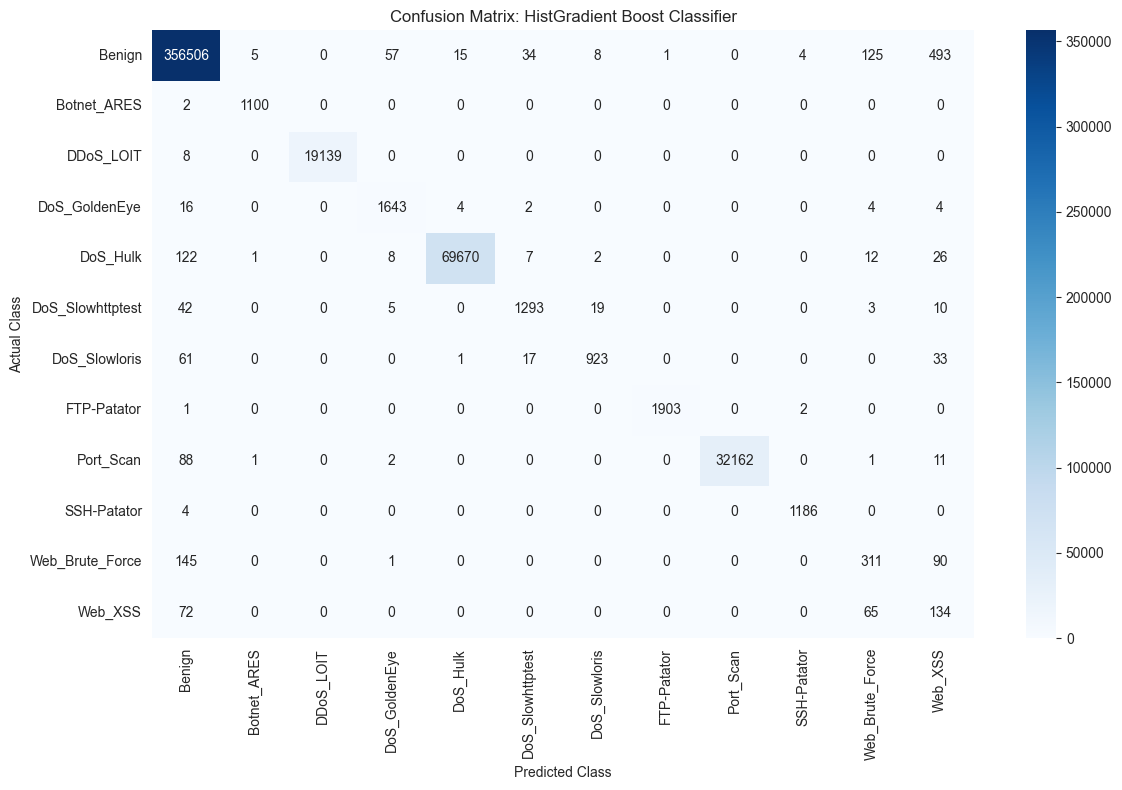

In [22]:
cm_hgbc = confusion_matrix(y_test, y_pred_hgbc)
labels = le.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_hgbc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix: HistGradient Boost Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Long Short Term Memory ##

In [23]:
# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])).astype('float32')
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_onehot = to_categorical(y_train).astype('float32')
y_test_onehot = to_categorical(y_test)

In [24]:
lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   

In [25]:
lstm.fit(X_train_lstm, y_train_onehot, epochs=30, batch_size=512, validation_split=0.2) 

Epoch 1/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9030 - loss: 0.3305 - val_accuracy: 0.9567 - val_loss: 0.0991
Epoch 2/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9545 - loss: 0.1064 - val_accuracy: 0.9572 - val_loss: 0.0948
Epoch 3/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9577 - loss: 0.0970 - val_accuracy: 0.9704 - val_loss: 0.0797
Epoch 4/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9699 - loss: 0.0813 - val_accuracy: 0.9915 - val_loss: 0.0454
Epoch 5/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9838 - loss: 0.0556 - val_accuracy: 0.9919 - val_loss: 0.0359
Epoch 6/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9855 - loss: 0.0486 - val_accuracy: 0.9920 - val_loss: 0.0326
Epoch 7/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9919 - val_loss: 0.0306
Epoch 8/30
3048/3048 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9870 - loss: 0.0437 -

In [33]:
y_pred_proba_lstm = lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)

print(f"LSTM Classifier Complete.")

15238/15238 ━━━━━━━━━━━━━━━━━━━━ 10s 661us/step
LSTM Classifier Complete.


In [27]:
print("Classification Report (LSTM):")
print(classification_report(y_test, y_pred_lstm, target_names=le.classes_))

Classification Report (LSTM):
                  precision    recall  f1-score   support

          Benign       0.99      1.00      1.00    357248
     Botnet_ARES       0.99      1.00      1.00      1102
       DDoS_LOIT       1.00      1.00      1.00     19147
   DoS_GoldenEye       0.99      0.89      0.94      1673
        DoS_Hulk       0.99      1.00      0.99     69848
DoS_Slowhttptest       0.75      0.80      0.77      1372
   DoS_Slowloris       0.95      0.76      0.85      1035
     FTP-Patator       0.89      0.83      0.86      1906
       Port_Scan       1.00      0.99      1.00     32265
     SSH-Patator       1.00      0.47      0.64      1190
 Web_Brute_Force       0.84      0.04      0.07       547
         Web_XSS       0.00      0.00      0.00       271

        accuracy                           0.99    487604
       macro avg       0.87      0.73      0.76    487604
    weighted avg       0.99      0.99      0.99    487604



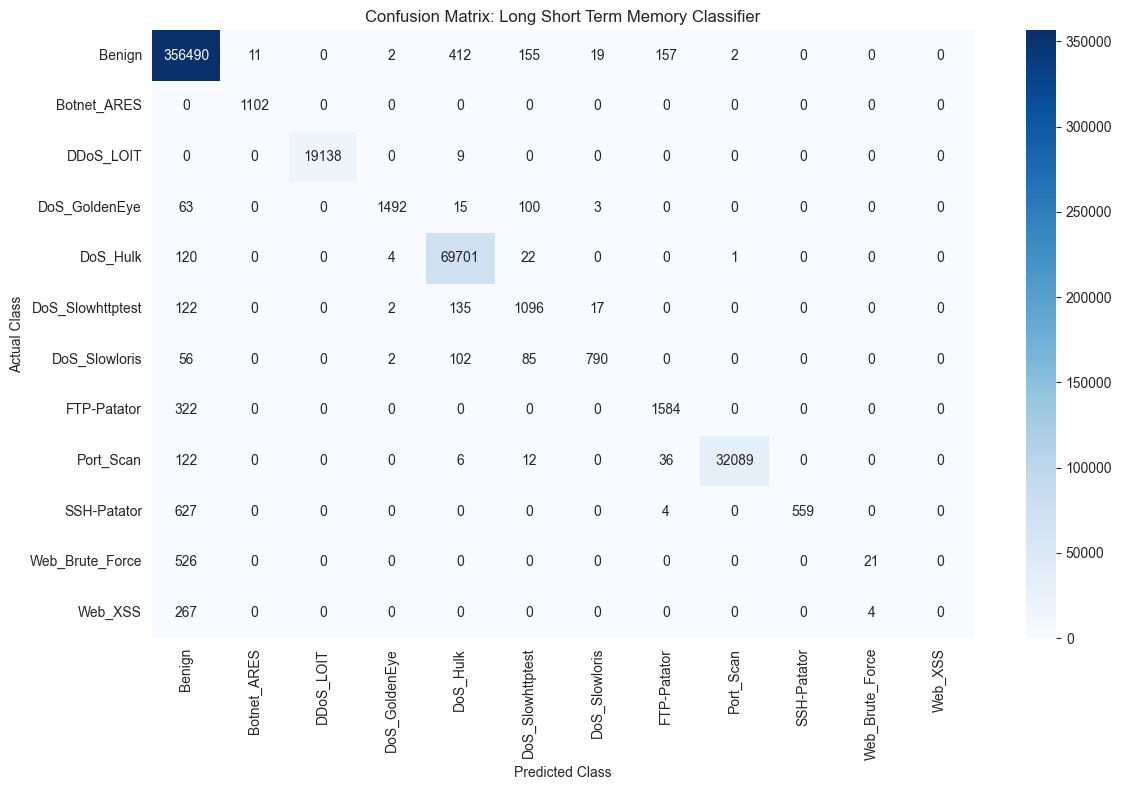

In [28]:
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
labels = le.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix: Long Short Term Memory Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Multi-Layer Perceptron ##

In [29]:
mlpc = MLPClassifier(
    hidden_layer_sizes=(100, 50), 
    max_iter=300, 
    random_state=42, 
    verbose=False
)
mlpc.fit(X_train, y_train)

y_pred_mlpc = mlpc.predict(X_test)
print(f"Multi-Layer Perceptron Complete.")

Multi-Layer Perceptron Complete.


In [30]:
print("Classification Report:")
print(classification_report(y_test, y_pred_mlpc, target_names=le.classes_))

Classification Report:
                  precision    recall  f1-score   support

          Benign       0.99      1.00      1.00    357248
     Botnet_ARES       0.96      1.00      0.98      1102
       DDoS_LOIT       1.00      1.00      1.00     19147
   DoS_GoldenEye       0.98      0.89      0.93      1673
        DoS_Hulk       0.99      1.00      0.99     69848
DoS_Slowhttptest       0.86      0.80      0.83      1372
   DoS_Slowloris       0.95      0.80      0.87      1035
     FTP-Patator       0.99      0.61      0.75      1906
       Port_Scan       1.00      1.00      1.00     32265
     SSH-Patator       0.83      0.47      0.60      1190
 Web_Brute_Force       1.00      0.05      0.10       547
         Web_XSS       1.00      0.01      0.03       271

        accuracy                           0.99    487604
       macro avg       0.96      0.72      0.76    487604
    weighted avg       0.99      0.99      0.99    487604



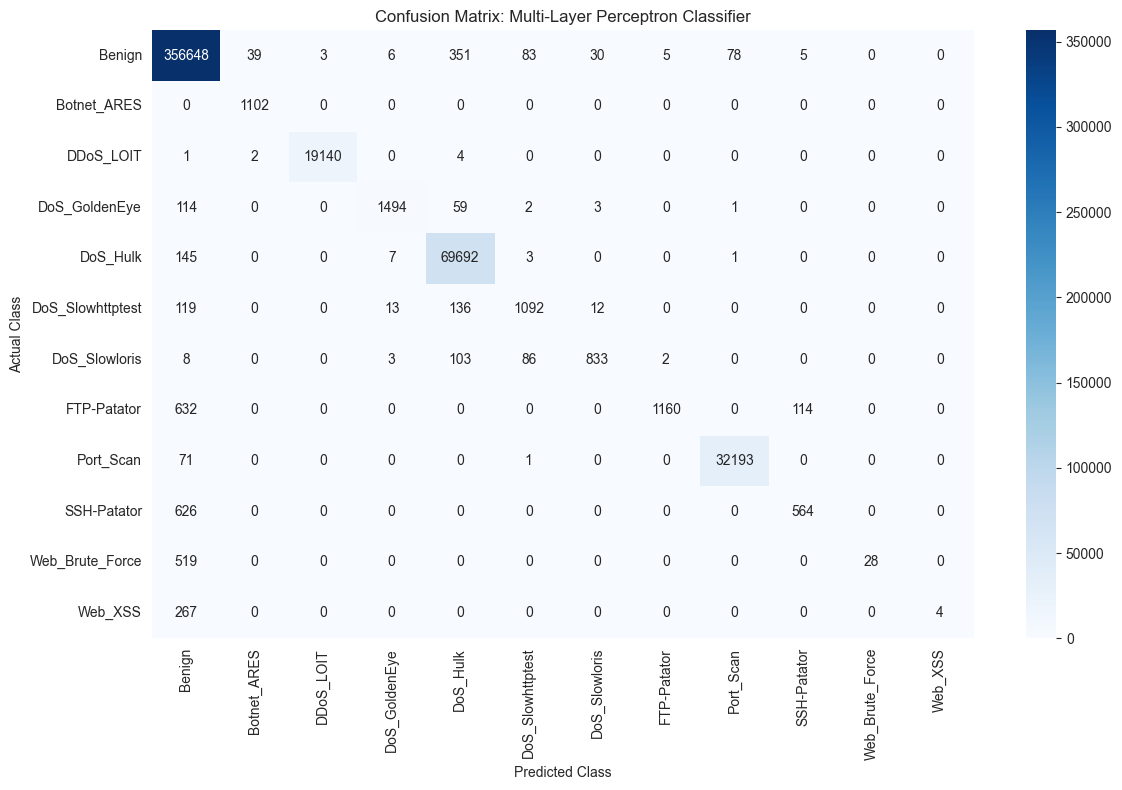

In [31]:
cm_mlpc = confusion_matrix(y_test, y_pred_mlpc)
labels = le.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_mlpc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix: Multi-Layer Perceptron Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary ##

In [32]:
reports = {
    "Random Forest": classification_report(y_test, y_pred_rfc, output_dict=True),
    "XGBoost": classification_report(y_test, y_pred_xgbc, output_dict=True),
    "CatBoost": classification_report(y_test, y_pred_cbc, output_dict=True),
    "HistGradientBoosting": classification_report(y_test, y_pred_hgbc, output_dict=True),
    "LSTM": classification_report(y_test, y_pred_lstm, output_dict=True),
    "MLP": classification_report(y_test, y_pred_mlpc, output_dict=True)
}

summary = []
for model_name, report in reports.items():
    row = {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1-Score (Macro)": report["macro avg"]["f1-score"]
    }
    summary.append(row)

summary_df = pd.DataFrame(summary)

summary_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Random Forest,0.999545,0.977377,0.973887,0.975586
1,XGBoost,0.999534,0.971243,0.972208,0.971663
2,CatBoost,0.998595,0.974835,0.910762,0.934077
3,HistGradientBoosting,0.996649,0.886094,0.905359,0.888805
4,LSTM,0.992736,0.866286,0.731915,0.759385
5,MLP,0.992506,0.963050,0.719646,0.757175
